<a href="https://colab.research.google.com/github/GiorgoR/Machine-learning/blob/main/Employee_attrition_mod9_GR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SETUP

In [ ]:
# Instalar última versión de yellowbrick y sklearn
!pip install numpy==1.20.3
!pip install pandas==1.2.4
!pip install yellowbrick==1.3.post1
!pip install scikit-learn==0.24.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.20.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.3 which is incompatible.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.20.3 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.8.2+zzzcolab20220527125636 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os

if not os.path.exists("data"):
    print("El directorio de data ha sido creado.")
    os.mkdir("data")
if not os.path.exists("fig"):
    print("El directorio de fig ha sido creado.")
    os.mkdir("fig")
    os.mkdir("fig/profundiza")

In [ ]:
# Instalar en colab
import sys
#
if 'google.colab' in sys.modules:
   !pip install -q dtreeviz

#import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

# Instalar última versión de yellowbrick
!pip install yellowbrick==1.3.post1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Librerias

In [ ]:
%matplotlib inline

# importar librerías estándar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import * 

# semilla para garantizar la reproducibildiad del código
seed = 1234

##Silenciar warnings

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#EXPLORACION DE DATOS

In [ ]:
data = pd.read_csv("/content/data/Employee_Attrition_datos_reto_binario-1.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [ ]:
# Resumen variables numéricas
data.select_dtypes(include = 'number').describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6588.0,39.622799,13.606920,19.0000,27.0000,37.0000,52.0000,65.0000
Education_Level,7000.0,3.187857,1.065102,1.0000,3.0000,3.0000,4.0000,5.0000
Time_of_service,6856.0,13.385064,10.364188,0.0000,5.0000,10.0000,21.0000,43.0000
Time_since_promotion,7000.0,2.367143,1.149395,0.0000,1.0000,2.0000,3.0000,4.0000
growth_rate,7000.0,47.064286,15.761406,20.0000,33.0000,47.0000,61.0000,74.0000
Travel_Rate,7000.0,0.817857,0.648205,0.0000,0.0000,1.0000,1.0000,2.0000
Post_Level,7000.0,2.798000,1.163721,1.0000,2.0000,3.0000,3.0000,5.0000
Pay_Scale,6991.0,6.006294,2.058435,1.0000,5.0000,6.0000,8.0000,10.0000
Work_Life_balance,6989.0,2.387895,1.122786,1.0000,1.0000,2.0000,3.0000,5.0000
VAR1,7000.0,3.098571,0.836377,1.0000,3.0000,3.0000,3.0000,5.0000


In [ ]:
# Resumen variables categóricas
data.select_dtypes(include = 'object').describe().T

,count,unique,top,freq
Employee_ID,7000,7000,EID_13727,1
Gender,7000,2,F,4114
Relationship_Status,7000,2,Married,4520
Hometown,7000,5,Lebanon,2070
Unit,7000,12,IT,1394
Decision_skill_possess,7000,4,Conceptual,1756
Compensation_and_Benefits,7000,5,type2,3945


In [ ]:
data['Compensation_and_Benefits'].describe()

count      7000
unique        5
top       type2
freq       3945
Name: Compensation_and_Benefits, dtype: object

In [ ]:
# Checar datos nulos
data.isnull().sum().head(100)

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_label                0
dtype: int64

##IMPUTAR VALORES FALTANTES

In [ ]:
#AGE = MODA
#TIME OF SERVICE = QUARTIL 25%
#PAY SCALE = MEDIAN
#WORK LIFE BALANCE = MODA (VALOR MAS REPETIDO Y POR EL CUAL SE TOMA POR LA DESERCIÓN QUE ESTAMOS BUSCANDO)

In [ ]:
#Variable Age - imputar con moda (Debido a que la tasa de deserción en personas mayores y el valor con mas frecuencia es 22, el segundo valor con mas frecuencia 25 )
#datos['Age'].unique()
#datos['Age'].value_counts().idxmax()
#datos['Age'].describe()
data['Age'].fillna(data['Age'].value_counts().idxmax(), inplace=True)

In [ ]:
#Variable Time of service - imputar con quartil de 25%, debido a que el dato mas frecuente es el de 6 años
#datos['Time_of_service'].describe()
#datos['Time_of_service'].unique()
#datos['Time_of_service'].value_counts()
data['Time_of_service'].fillna(data['Time_of_service'].quantile(0.25), inplace=True)

In [ ]:
#Variable Pay_Scale - imputar con mediana, ya que es uno de los valores que mas se acerca la frecuencia
#datos['Pay_Scale'].value_counts()
#datos['Pay_Scale'].describe()
data['Pay_Scale'].fillna(data['Pay_Scale'].median(), inplace=True)

In [ ]:
#Variable Work_Life_balance - imputar con moda debido a que el valor maximo es de 1 
#datos['Work_Life_balance'].unique()
#datos['Work_Life_balance'].describe()
#datos['Work_Life_balance'].value_counts()
data['Work_Life_balance'].fillna(data['Work_Life_balance'].value_counts().idxmax(), inplace=True)

In [ ]:
data.drop(['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7'], axis='columns', inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        7000 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            7000 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  7000 non-null   float

count    7000.000000
mean        0.367571
std         0.482178
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Attrition_label, dtype: float64


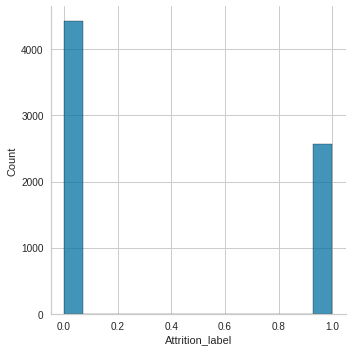

In [ ]:
# Grafica la distribución del tasa de deserción.
print(data.Attrition_label.describe())
sns.displot(data.Attrition_label)
plt.show()

#CONJUNTOS DE ENTRENAMIENTO Y PRUEBA

In [ ]:
X = data
y = data.Attrition_label
#y = data['Attrition_label']
y.shape

(7000,)

In [ ]:
#Datos de prueba
7000 * .2

1400.0

In [ ]:

from sklearn.model_selection import train_test_split
train_full, test_set = train_test_split(
    X,  
    test_size = 0.2,    # define el tamaño
    shuffle=True,        # aleatoriza?
    random_state=1234,  # fija una semilla?
)

In [ ]:
print(f"Dimensiones del conjunto de entrenamiento: {train_full.shape}")

Dimensiones del conjunto de entrenamiento: (5600, 17)


In [ ]:
train_full

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_label
869,EID_2789,M,56.0,1,Single,Springfield,IT,Conceptual,33.0,3,72,0,1,6.0,type2,3.0,0
1971,EID_11652,F,41.0,3,Single,Springfield,Purchasing,Directive,18.0,4,61,0,3,5.0,type2,4.0,0
6162,EID_8105,F,44.0,1,Married,Lebanon,Sales,Conceptual,12.0,4,30,1,3,10.0,type2,2.0,0
4194,EID_23686,F,27.0,2,Married,Lebanon,IT,Analytical,3.0,3,28,2,5,8.0,type2,3.0,1
1508,EID_23863,M,19.0,4,Married,Lebanon,IT,Behavioral,0.0,0,68,0,4,4.0,type3,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,EID_3400,F,54.0,3,Married,Springfield,Marketing,Behavioral,18.0,3,41,1,5,2.0,type2,1.0,0
3276,EID_4146,F,64.0,5,Married,Springfield,Human Resource Management,Analytical,29.0,3,57,1,3,8.0,type2,1.0,0
1318,EID_24531,M,25.0,1,Single,Clinton,Marketing,Conceptual,6.0,2,56,1,1,6.0,type2,1.0,1
723,EID_6733,F,25.0,3,Single,Springfield,Logistics,Directive,29.0,4,21,1,4,4.0,type3,4.0,1


In [ ]:
print(f"Dimensiones del conjunto de prueba: {test_set.shape}")

Dimensiones del conjunto de prueba: (1400, 17)


In [ ]:
test_set

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_label
6503,EID_3558,F,59.0,4,Single,Springfield,Sales,Analytical,32.0,1,35,1,3,6.0,type3,1.0,1
4944,EID_4094,F,49.0,4,Married,Lebanon,R&D,Conceptual,23.0,1,69,1,1,6.0,type4,3.0,0
5285,EID_16102,F,26.0,4,Married,Lebanon,Purchasing,Analytical,3.0,3,24,1,1,8.0,type2,3.0,0
5219,EID_22829,F,22.0,3,Married,Lebanon,Accounting and Finance,Conceptual,3.0,1,40,1,2,8.0,type2,2.0,0
2988,EID_24626,M,37.0,4,Single,Springfield,Logistics,Analytical,13.0,4,52,1,2,3.0,type2,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,EID_13834,F,30.0,3,Single,Lebanon,R&D,Conceptual,6.0,4,66,1,2,5.0,type4,1.0,1
1750,EID_12480,M,39.0,3,Married,Franklin,IT,Behavioral,13.0,2,63,1,3,7.0,type2,3.0,0
2719,EID_22201,M,45.0,3,Single,Washington,IT,Directive,19.0,2,31,2,2,4.0,type3,2.0,0
2668,EID_20001,M,42.0,4,Single,Franklin,Logistics,Behavioral,14.0,3,72,1,2,5.0,type2,1.0,1


#ANALISIS EXPLORATORIO

* Analisis de datos de entrenamiento

In [ ]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 869 to 2863
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                5600 non-null   object 
 1   Gender                     5600 non-null   object 
 2   Age                        5600 non-null   float64
 3   Education_Level            5600 non-null   int64  
 4   Relationship_Status        5600 non-null   object 
 5   Hometown                   5600 non-null   object 
 6   Unit                       5600 non-null   object 
 7   Decision_skill_possess     5600 non-null   object 
 8   Time_of_service            5600 non-null   float64
 9   Time_since_promotion       5600 non-null   int64  
 10  growth_rate                5600 non-null   int64  
 11  Travel_Rate                5600 non-null   int64  
 12  Post_Level                 5600 non-null   int64  
 13  Pay_Scale                  5600 non-null   flo

In [ ]:
train_full.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
Attrition_label              0
dtype: int64

In [ ]:
(
    pd.concat([train_full.assign(set = 'train'), test_set.assign(set = 'test')], axis = 0)
        .loc[:,['set', 'Attrition_label']]
        .groupby(['set','Attrition_label'])
        .size()
        .reset_index()
        .rename(columns = {0:'conteos'})
        .pivot(index='set', columns='Attrition_label', values='conteos', )
)

Attrition_label,0,1
set,,
test,890,510
train,3537,2063


In [ ]:
# Cuantitativas
train_full.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_label
count,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000
mean,38.659821,3.188036,13.123393,2.365179,47.081607,0.823929,2.793571,5.999821,2.388750,0.368393
std,13.654757,1.068890,10.262388,1.153375,15.733116,0.645978,1.162565,2.065848,1.123924,0.482412
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,26.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,0.000000
50%,36.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,0.000000
75%,51.000000,4.000000,20.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,1.000000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,1.000000


In [ ]:
# Cualitativas
train_full.describe(include=[object])

,Employee_ID,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
count,5600,5600,5600,5600,5600,5600,5600
unique,5600,2,2,5,12,4,5
top,EID_3948,F,Married,Lebanon,IT,Directive,type2
freq,1,3331,3637,1637,1135,1417,3211


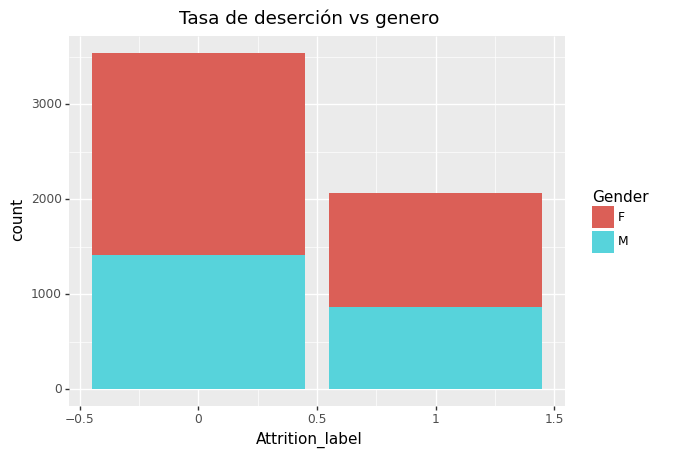

<ggplot: (8777237297433)>

In [ ]:
(
    ggplot(train_full.assign(count = 1), aes( x = 'Attrition_label', y = 'count', fill = 'Gender')) + 
    geom_col() + 
    labs(title = "Tasa de deserción vs genero")
)

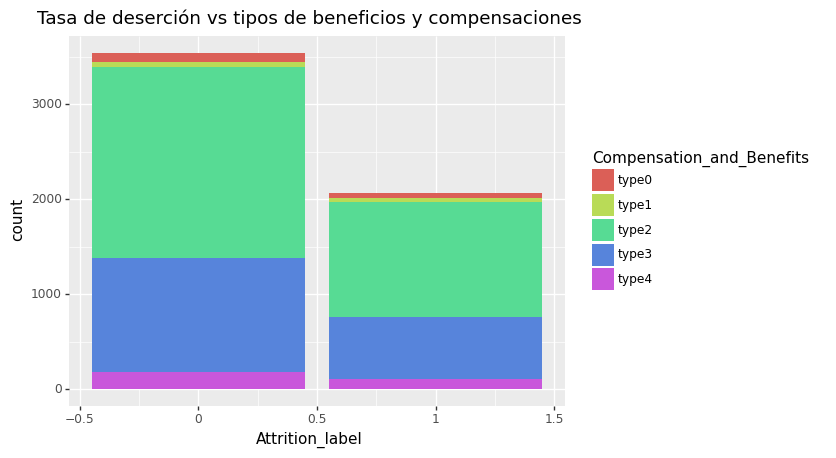

<ggplot: (8777325899585)>

In [ ]:
(
    ggplot(train_full.assign(count = 1), aes( x = 'Attrition_label', y = 'count', fill = 'Compensation_and_Benefits')) + 
    geom_col() + 
    labs(title = "Tasa de deserción vs tipos de beneficios y compensaciones")
)

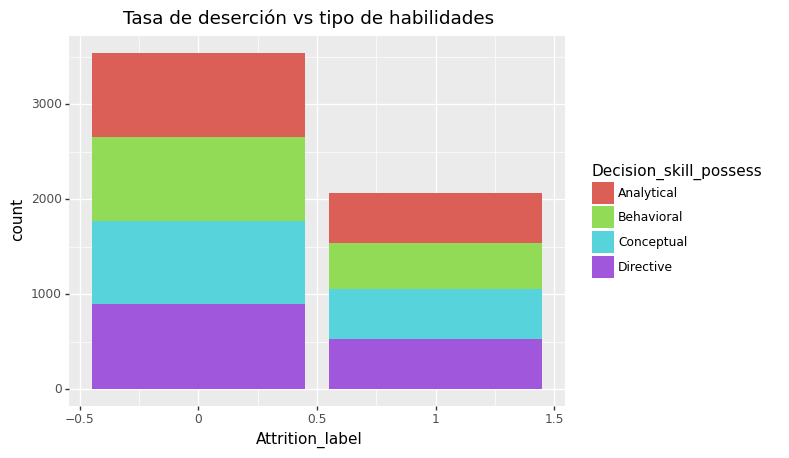

<ggplot: (8777288333061)>

In [ ]:
(
    ggplot(train_full.assign(count = 1), aes( x = 'Attrition_label', y = 'count', fill = 'Decision_skill_possess')) + 
    geom_col() + 
    labs(title = "Tasa de deserción vs tipo de habilidades")
)

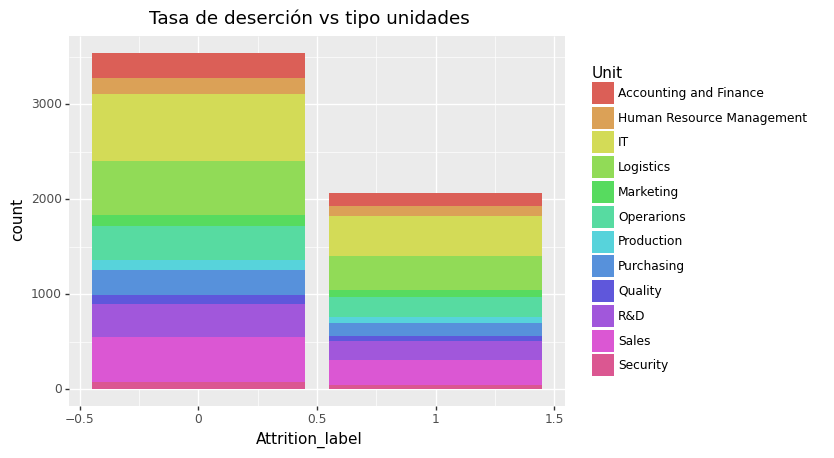

<ggplot: (8777288333237)>

In [ ]:
(
    ggplot(train_full.assign(count = 1), aes( x = 'Attrition_label', y = 'count', fill = 'Unit')) + 
    geom_col() + 
    labs(title = "Tasa de deserción vs tipo unidades")
)

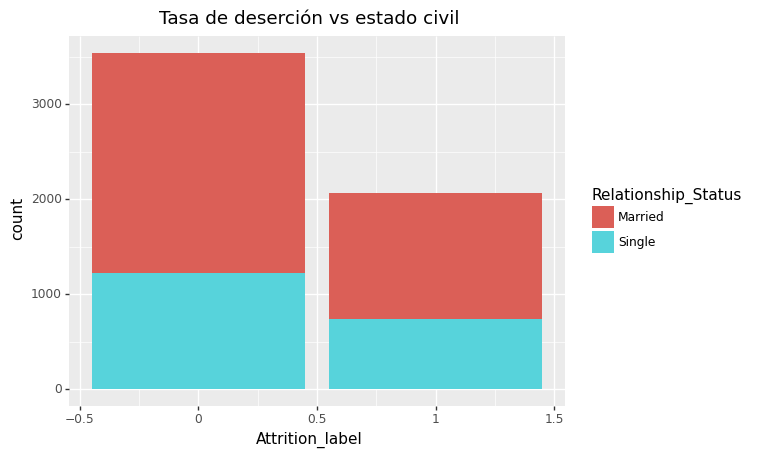

<ggplot: (8777288431929)>

In [ ]:
(
    ggplot(train_full.assign(count = 1), aes( x = 'Attrition_label', y = 'count', fill = 'Relationship_Status')) + 
    geom_col() + 
    labs(title = "Tasa de deserción vs estado civil")
)

- Ingisghts:
    + Con esto podremos darnos cuenta que es un problema de clasificación, hay que investigar que tipo de métodos se pueden emplear para predecir la probabilidad de una observación de pertenecer a cada una de las categorías. 
    + Hay caracteristicas cualitativas y cuantitativas

* Herramienta de visualización la gráfica de Yellowbrick-Class Balance. 

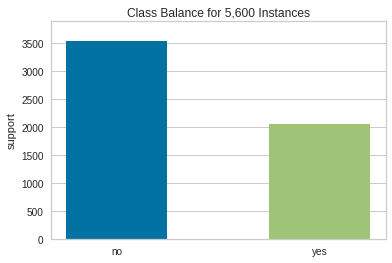

In [ ]:
from yellowbrick.target import ClassBalance
class_visualizer = ClassBalance(
	labels=["no", "yes"]			# Indicamos las etiquetas de las clases. 
									# Ten cuidado con el orden de las etiquetas.
)
class_visualizer.fit(train_full.Attrition_label)
class_visualizer.show(outpath="fig/profundiza/01_class_balance.png");

In [ ]:
from sklearn.model_selection import train_test_split
train_set, validation_set = train_test_split(
    train_full,							# Pasamos el conjunto de entrenamiento 
    test_size = test_set.shape[0], 		# Indicamos la cantidad de observaciones que
    									# queremos en nuestro conjunto de validación.
    									# Observa que lo estamos haciendo en función
    									# del tamaño del conjunto de prueba, para 
    									# facilmente garantizar que saquemos otro
    									# 10% de los datos totales.
    stratify=train_full.Attrition_label,				# Indica la variable por la que vamos a estratificar.
    random_state=1234					# Proporcionamos una semilla para garantizar
    									# la reproducibilidad.
)

*Dimensiones correctas:

In [ ]:
train_set.shape, validation_set.shape, test_set.shape

((4200, 17), (1400, 17), (1400, 17))

In [ ]:
train_set.Attrition_label.value_counts(normalize=True)

0    0.631667
1    0.368333
Name: Attrition_label, dtype: float64

In [ ]:
validation_set.Attrition_label.value_counts(normalize=True)

0    0.631429
1    0.368571
Name: Attrition_label, dtype: float64

In [ ]:
test_set.Attrition_label.value_counts(normalize=True)

0    0.635714
1    0.364286
Name: Attrition_label, dtype: float64

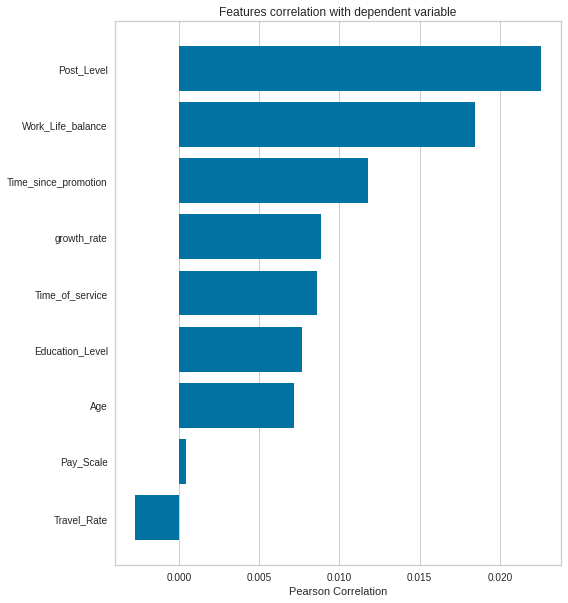

In [ ]:
from yellowbrick.target import FeatureCorrelation

# Selecciona las variables numéricas
tbl_raw_no_na = (
    train_full
        .select_dtypes(include = 'number')                           # <--- Selecciona las variables numéricas
        .dropna()                             # <--- Elimina las filas con registros nulos
)

# Calculas las correlaciones y graficalas con 
fig, ax = plt.subplots(figsize = (8, 10))
visualizer = FeatureCorrelation(                       # <--- Crear la gráfica de feature correlation.
    sort =   True                        # <--- Ordena de mayor a menor
)
visualizer.fit(
    tbl_raw_no_na.drop(columns = ['Attrition_label']), 
    tbl_raw_no_na['Attrition_label']
)
visualizer.show()

In [ ]:
def fun_preprocess_numeric_variables(df):
#    '''Regresa un data frame con las variables numéricas preprocesadas.
    
#    Codificar mes como una variable numéricas
#    Seleccionar el resto de las varaibles numéricas.
    
#    Parameters
#    ----------
#    df: DataFrame
#        DataFrame con los datos del banco.
#    Returns
#    -------
#    DataFrame
#        DataFrame con los campos numéricos preprocesados . 
 #   '''
    relationship_enc = {
        'Single': 0, 'Married':1
    }
    df_relationship = df.Relationship_Status.map(relationship_enc).to_frame()
    
    gender_enc = {
        'F': 0, 'M': 1
    }
    df_gender = df.Gender.map(gender_enc).to_frame()

    compensation_enc = {
        'type0':0, 'type1':1, 'type2':2, 'type3':3, 'type4':4
    }
    df_compensation = df.Compensation_and_Benefits.map(compensation_enc).to_frame()
    df_numeric = df[['Education_Level', 'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Work_Life_balance' ]]
    
    return pd.concat([df_relationship, df_gender, df_compensation, df_numeric], axis = 1)

def fun_preprocess_categorical_variables(df):
#    '''Regresar un data frame con las variables categóricas preprocesadas.

#    Convierte en dummies las variables categóricas (loan, housing, marital contact, 
#    unknown, other, education y job). 
#    En algunos casos recodifica algunas categorías con replace.
#    Para una variable categórica se elimina la primera opción con drop_first
#    esto es para evitar problemas de multicolinealidad en algunos algorítmos.
    
#    Parameters
#    ----------
#    df: DataFrame
#        DataFrame con los datos del banco.
        
#    Returns
#    -------
#    DataFrame
#        DataFrame con los campos categóricos preprocesados.  
#    '''
    #columns = ['Employee_ID', 'Attrition_rate', 'Time_of_service','Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess','Compensation_and_Benefits']
    #categoricas = pd.DataFrame(datos, columns=columns) #variables categoricas y variable respuesta (y) 

#    df_employee = pd.get_dummies(df[['Employee_ID']], drop_first = True)
#    df_gender = pd.get_dummies(df[['Gender']], drop_first = True)
#    df_relationship = pd.get_dummies(df[['Relationship_Status']], drop_first = True)
    df_hometown = pd.get_dummies(df[['Hometown']], drop_first = True)
    df_unit = pd.get_dummies(df[['Unit']], drop_first = True)
    df_skill = pd.get_dummies(df[['Decision_skill_possess']], drop_first = True)
#    df_compensation = pd.get_dummies(df[['Compensation_and_Benefits']], drop_first = True)

#    return pd.concat([df_employee, df_gender, df_relationship, df_hometown, df_unit, df_skill, df_compensation], axis = 1)
    
    
    return pd.concat([df_hometown, df_unit, df_skill], axis = 1)
def fun_preprocesar_atributos(df):
#    '''Regresa un DataFrame con los datos numéricos y categóricos preprocesados
    
#    Parameters
#    ----------
#    df: DataFrame
#        DataFrame con los datos del banco.
        
#    Returns
#    -------
#    DataFrame
#       DataFrame con los datos preprocesados
#    '''
    df_numeric = fun_preprocess_numeric_variables(df) 
    df_categorical = fun_preprocess_categorical_variables(df)
    
    return pd.concat([df_numeric, df_categorical], axis = 1)

def fun_preprocesar_categoria(df):
#    '''Regresa un numpy array con la variable dependiente
    
#    Toma los datos del banco, extrae la variable dependiente,
#    la convierte en una variable de dummy donde:
#        1 = el cliente sí aceptó el depósito a plazo
#        0 = el cliente no aceptó el depósito a plazo
        
#    Asimismo, se convierten los datos a int64 y se formata el
#    array para que tenga la siguiente dimensión (n, )
    
    
#    Parameters
#    ----------
#    df: DataFrame
#        DataFrame con los datos del banco.
        
#    Returns
#    -------
#    ndarray
#        Regresa un numpy array con dimensión (n, ) con la variable
#        dependiente que toma valores de 1 y 0.
#    '''
    
    return pd.get_dummies(df.Attrition_label, drop_first=True).astype('int64').values.ravel()
#    return pd(df.Attrition_label, drop_first=True).astype('int64').values.ravel()

In [ ]:
assert fun_preprocesar_atributos(train_set).columns.tolist() == fun_preprocesar_atributos(test_set).columns.tolist()
assert fun_preprocesar_atributos(train_set).columns.tolist() == fun_preprocesar_atributos(validation_set).columns.tolist()

In [ ]:
train_set.shape, validation_set.shape, test_set.shape

((4200, 17), (1400, 17), (1400, 17))

In [ ]:
fun_preprocesar_atributos(train_set).shape, fun_preprocesar_atributos(validation_set).shape, fun_preprocesar_atributos(test_set).shape

((4200, 29), (1400, 29), (1400, 29))

In [ ]:
X_train = fun_preprocesar_atributos(train_set)
y_train = fun_preprocesar_categoria(train_set)

X_val = fun_preprocesar_atributos(validation_set)
y_val = fun_preprocesar_categoria(validation_set)

X_test = fun_preprocesar_atributos(test_set)
y_test = fun_preprocesar_categoria(test_set)

In [ ]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((4200, 29), (1400, 29), (1400, 29), (4200,), (1400,), (1400,))

# MODELO BASE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Especificamos un modelo de árbol de decisión
clf_dt = DecisionTreeClassifier(
    max_depth = 2, 
    class_weight = 'balanced', 	# Indicamos que se deben reponderar las clases.
    random_state=1234			# Indicamos una semilla para reproducibilidad.
)
# Ajustamos el modelo y predecimos
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_val)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  -0.5 and 0.5 round to 0.0, etc.
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


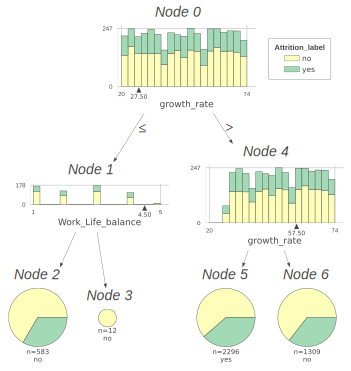

In [ ]:
import dtreeviz
# Construimos una visualización
viz = dtreeviz.trees.dtreeviz(
    clf_dt, 						# Especificamos el modelo (debe ser un estimador) 
    X_train, y_train, 				# Especificamos los datos de entrenamiento
    feature_names=X_train.columns, 	# Escpeficiamos el nombre las variables
    target_name = 'Attrition_label', 	# Indicamos como se llama la variable de clasificación
    class_names={0:'no', 1:'yes'}, 	# Indicamos el nombre de las clases
    show_node_labels=True, 			# Indicamos que queremos el nombre de los nodos
)
viz.save("fig/profundiza/02_decision_tree.svg")
viz

In [ ]:
# Seleccionamos un empleado, el que sea
datos_cliente_ejemplo = X_train.iloc[3000]
datos_cliente_ejemplo

Relationship_Status                   1.0
Gender                                1.0
Compensation_and_Benefits             2.0
Education_Level                       3.0
Time_of_service                      19.0
Time_since_promotion                  4.0
growth_rate                          37.0
Travel_Rate                           0.0
Post_Level                            3.0
Pay_Scale                             8.0
Work_Life_balance                     3.0
Hometown_Franklin                     1.0
Hometown_Lebanon                      0.0
Hometown_Springfield                  0.0
Hometown_Washington                   0.0
Unit_Human Resource Management        0.0
Unit_IT                               0.0
Unit_Logistics                        0.0
Unit_Marketing                        0.0
Unit_Operarions                       0.0
Unit_Production                       0.0
Unit_Purchasing                       0.0
Unit_Quality                          0.0
Unit_R&D                          

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  -0.5 and 0.5 round to 0.0, etc.
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


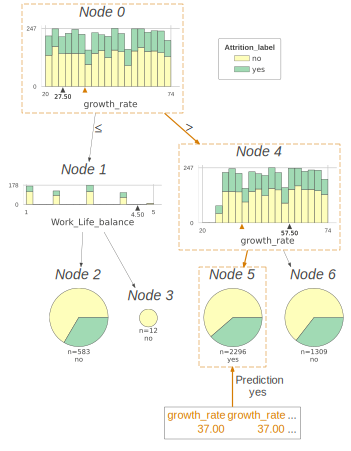

In [ ]:
# Construimos el árbol para explciar el camino
viz = dtreeviz.trees.dtreeviz(
    clf_dt, 						
    X_train, y_train, 				
    feature_names=X_train.columns, 	
    target_name = 'Attrition_label', 	
    class_names={0:'no', 1:'yes'}, 	
    show_node_labels=True, 			
    X = datos_cliente_ejemplo, 		# Damos los datos para un solo cliente
)
viz.save("fig/profundiza/03_decision_tree_client_prediction.svg")
viz

In [ ]:
from dtreeviz.trees import explain_prediction_path
print(
    explain_prediction_path(
        clf_dt,								# Especificamos el modelo (debe ser un estimador ajustado) 
        datos_cliente_ejemplo, 				# Proporcionamos los datos del cliente ejemplo
        feature_names=X_train.columns, 		# Proporcionamos el nombre de las variables
        explanation_type="plain_english"	# Indicamos que la explicación la queremos en palabras.
    )
)											# Para que los resultados se vean bien hay que encerarrlos 
											# en la función print

27.5 <= growth_rate  < 57.5



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  -0.5 and 0.5 round to 0.0, etc.
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


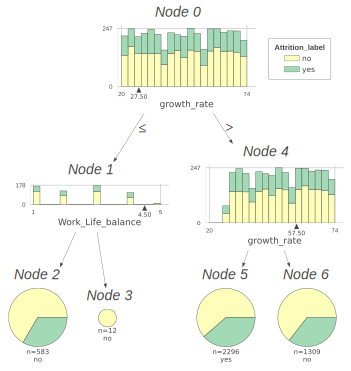

In [ ]:
# Especificamos un modelo de árbol de decisión

clf_dt = DecisionTreeClassifier(
    max_depth = 2, # Prueba con otros hiperparámetros y valores
    class_weight = 'balanced', 
    random_state=1234
    )

# # Ajustamos el modelo y predecimos
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_val)
## Construimos una visualización
dtreeviz.trees.dtreeviz(
    clf_dt, 
    X_train, y_train, 
    feature_names=X_train.columns, 
    target_name = 'Attrition_label', 
    class_names={0:'no', 1:'yes'}, 
    show_node_labels=True
    )

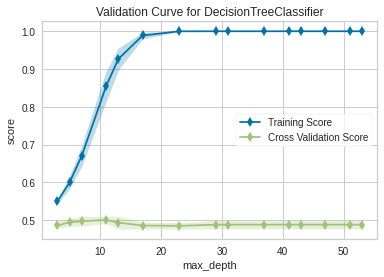

In [ ]:
from yellowbrick.model_selection import ValidationCurve

# Especificamos un modelo de árbol de decisión
clf_dt = DecisionTreeClassifier(
    max_depth = 4, 
    class_weight = 'balanced', 	# Indicamos que se deben reponderar las clases.
    random_state=1234			# Indicamos una semilla para reproducibilidad.
)

# Especificamos la curva de validación
viz = ValidationCurve(
    clf_dt, 							# Especificar el modelo (debe ser un estiamdor)
    param_name="max_depth",				# Especificar un solo hiperparámetro a evaluar
    param_range=[3, 5, 7, 11, 13, 17, 	# Dara una lista o numpy.array con los valores probar
    			23, 29, 31, 37, 41, 
    			43, 47, 51, 53], 
    cv=5, 								# Indicar el valor k, para construir la validación cruzada
    scoring="roc_auc",					# Indicar la métrica de evaluación para el modelo.
    n_jobs=-1							# Indicar cuántos CPUs utilizar para paralelizar el trabajo.
    									# n_jobs=-1, signfica utilizar todos los CPUs disponibles.
)
# Ajustamos el modelo y la visualización
viz.fit(X_train, y_train)
# Imprimimos en la pantalla la visualización.
viz.show(outpath="fig/profundiza/04_curva_validacion_max_depth.png");

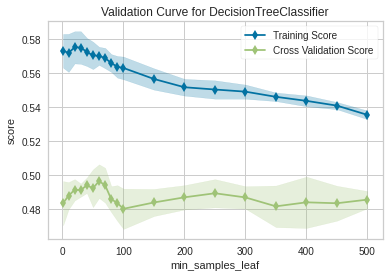

In [ ]:
viz = ValidationCurve(
    clf_dt, 							
    param_name="min_samples_leaf",		# Probamos con un nuevo hiperparámetro 
    param_range=[1, 10, 20, 30, 40,		# Especificamos una lista con los nuevos
    			50, 60, 70, 80, 90,		# valores. 
    			100, 150, 200, 250, 
    			300, 350, 400, 450, 
    			500], 
    cv=5, 
    scoring="roc_auc",
    n_jobs=-1
)
# Ajustamos el modelo y la visualización
viz.fit(X_train, y_train)
# Imprimimos en la pantalla la visualización.
viz.show(outpath="fig/profundiza/05_curva_validacion_min_samples_leaf.png");

#Exploración de hiperparámetros y selección del mejor modelo. 

##Busqueda de hiperparametros

In [ ]:
from sklearn.model_selection import GridSearchCV
# Especificamos un modelo de árbol de decisión
clf_dt = DecisionTreeClassifier(
    class_weight = 'balanced', 	# Indicamos que se deben reponderar las clases.
    random_state=1234			# Indicamos una semilla para reproducibilidad.
)

# Especificar diccionario de parámteros y valores a explorar
params = {
    'max_depth':[5, 10, 50, 100, 150, 200],
    'min_samples_split':[2, 4, 6, 8],
    'min_samples_leaf':[1, 2, 4, 5]
}
# Especificar opciones del Grid Search 
grid_search = GridSearchCV(
    clf_dt, 				# Indicar el modelo (debe ser un estimador).
    scoring = 'roc_auc', 	# Indicar la métrica para evaluar el desempeño del
    						# modelo en validación cruzada.
    param_grid=params, 		# Indicar el diccionario de parámetros y valores
    cv = 10, 				# Indicar los k cortes de validación cruzada.
    return_train_score=True,# Agregar el error de entrenamiento
    n_jobs = -1				# Indicar cuántos CPUs utilizar para paralelizar el 
    						# trabajo.

)
# Entrenar los modelos
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=1234),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 50, 100, 150, 200],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 4, 6, 8]},
             return_train_score=True, scoring='roc_auc')

##Seleccion del mejor modelo

In [ ]:
def fun_plot_grid_search_results(df):   
    '''Regresa un DataFrame con los resultados de la exploración de hiperparámetros.

    Esta función muestra una tabla estilizada con los resultados de la exploración de
    hiper parámetros utilizando validación cruzada.
    
    En la tabla aparecen del lado izquierdo la combinación de hiperparámetros, el error
    de entrenamiento y el error de validación cruzada y el ranking del mejor modelo
    a partir del error de validación.
    
    El mapa de color va de azul (modelos con menor error) a rojo (modelos con mayor error).
    Se calcula para el error de entrenamiento y validación de manera separada.
    
    Los resultados están ordenados de mejor a peor modelo, en función del error de validación.
    
    Parameters
    ----------
    dict: Diccionario con los resultados de la búsqueda de hiperparámetros GridSearchCV.cv_results_ 
        
    Returns
    -------
    pandas.io.formats.style.Styler
        Regresa una tabla estilizada con los resultados de la búsqueda de hiperparámetros.
    '''
    # Elegir paleta divergente de colores
    cm = sns.diverging_palette(5, 250, as_cmap=True)
    
    return (
        pd.concat([
            # Limpiar la columna de parámetros
            df['params'].apply(pd.Series), 
            # Extraer solamente el error de prueba 
            df[['mean_train_score', 'mean_test_score', 'rank_test_score']]],
            axis = 1
        )
        # Ordenar los modelos de mejor a peor
        .sort_values(by = 'rank_test_score')
        # Pintar el fondo de la celda a partir del error de validación
        .style.background_gradient(cmap=cm, subset = ['mean_train_score', 'mean_test_score'])
    )

In [ ]:
# Recupearar los resultados de la validación cruzada
df_best_params = pd.DataFrame(grid_search.cv_results_)
tabla_resultados = fun_plot_grid_search_results(df_best_params)
tabla_resultados

,max_depth,min_samples_leaf,min_samples_split,mean_train_score,mean_test_score,rank_test_score
48,100,1,2,1.000000,0.503209,1
80,200,1,2,1.000000,0.503209,1
64,150,1,2,1.000000,0.503209,1
32,50,1,2,1.000000,0.503209,1
31,10,5,8,0.757904,0.501900,5
30,10,5,6,0.757904,0.501900,5
29,10,5,4,0.757904,0.501900,5
28,10,5,2,0.757904,0.501900,5
66,150,1,6,0.987635,0.501819,9
82,200,1,6,0.987635,0.501819,9


In [ ]:
def fun_resumen_grid_search(grid_search):
    '''Imprime un resumen del grid search.
    
    Imprime el número de modelos que se entrenaron y 
    devuelve los hiperparámetros del mejor modelo.
    
    Parameters
    ----------
    grid_search (GridSearchCV): Fitted GridSearch con los resultados.
    '''
    best_params = grid_search.best_params_
    print("\nSe evaluaron {} modelos utilizando el grid search.".format(pd.DataFrame(grid_search.cv_results_).shape[0]))
    print("\nLos hiperparámetros del mejor modelo son: " + str(best_params) + "\n")

In [ ]:
# Recuepar los resultados de la validación cruzada.
fun_resumen_grid_search(grid_search)


Se evaluaron 96 modelos utilizando el grid search.

Los hiperparámetros del mejor modelo son: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}



In [ ]:
# Recuperar el estimador del mejor modelo.
best_model = grid_search.best_estimator_

##Predicciones

In [ ]:
# Utilizar el mejor modelo para predecir la clase 
y_pred = best_model.predict(X_val)
# Mostrar las clases de los primeros 20 clientes
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
# Utilizar el mejor modelo para predecir la probabilidad.
y_pred_proba = best_model.predict_proba(X_val)[:,1]
# Mostrar las probabilidades de los primeros 20 clientes
y_pred_proba[:20]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0.])

#Evaluacion de ajuste

##Graficar calidad de ajuste

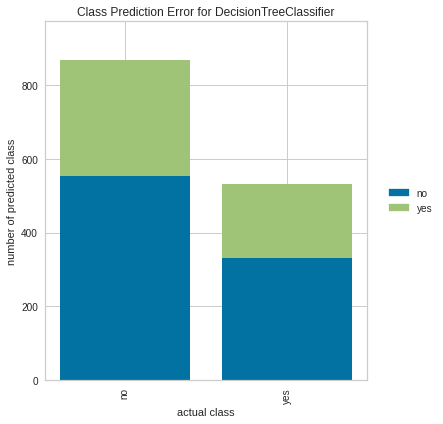

In [ ]:
from yellowbrick.classifier import ClassPredictionError
# Creamos la figura
fig, ax = plt.subplots(figsize = (7,6))
cpe_viz = ClassPredictionError(
    best_model,					# Pasar el estimador del mejor modelo que 
    							# se obtiene de la validación cruzada.  
    classes = ['no', 'yes']		# Indicar las etiquetas de las clases.
    							# Cuidado con el orden de los nombres.
)
# Ajustamos la visualización a los datos de entrenamiento
cpe_viz.fit(X_train, y_train)
# Evaluamos los errores en la predicción utilizando los datos de validación.
cpe_viz.score(X_val, y_val)
# Dibjuamos la visualización.
cpe_viz.show(outpath="fig/profundiza/07_error_clasificacion.png");

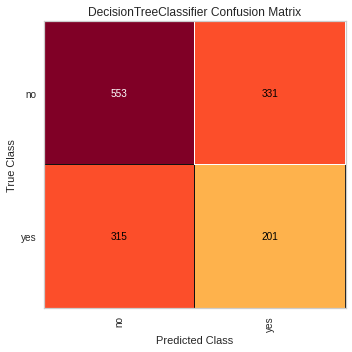

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
fig, ax = plt.subplots(figsize = (5,5))
# Creamos la matrix de confusión
cm = ConfusionMatrix(
    best_model, 				# Pasar el estimador del mejor modelo que 
    							# se obtiene de la validación cruzada. 
    classes=['no', 'yes']		# Indicar las etiquetas de las clases.
    							# Cuidado con el orden de los nombres.
)
# Ajustamos la visualización a los datos de entrenamiento
cm.fit(X_train, y_train)
# Evaluamos los errores en la predicción utilizando los datos de validación.
cm.score(X_val, y_val)
# Dibjuamos la visualización.
cm.show(outpath="fig/profundiza/08_matriz_confusion.png");

In [ ]:
# Matriz de confusión implementación de Sklearn
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[553, 331],
       [315, 201]])

##Selección del punto de corte para problemas de clasificación binaria 

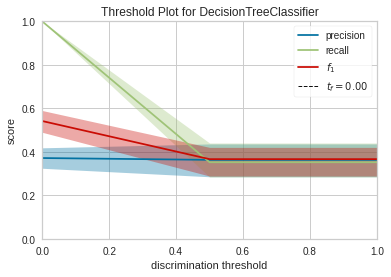

In [ ]:
from yellowbrick.classifier.threshold import DiscriminationThreshold
# Especificamos la gráfica
visualizer = DiscriminationThreshold(
	best_model,							# Pasar el estimador del mejor modelo que 
    									# se obtiene de la validación cruzada. 
	exclude = ["queue_rate"]			# Excluimos de la gráfica algunas métricas
)
# Ajustamos la visualización a los datos de entrenamiento
visualizer.fit(X_val, y_val)
# Dibjuamos la visualización.
visualizer.show(outpath="fig/profundiza/09_discrimination_threshold.png");  

In [ ]:
# Clasificar con un punto de corte más alto que 0.5
def fun_predict_with_threshold(model, threshold = 0.5):
    '''Predice la clase del cliente utilizando un threshold
    
    Permite predecir la clase de un cliente utilizando otros 
    puntos de corte (threshold) que sean diferentes a 0.5.
    
    Parameters
    ----------
    model: Fitted estimator
    threshold (float): Punto de corte entre 0 y 1.
        
    Returns
    -------
    ndarray:
        Regresa un numpy array con el valor de la clase 0 ó 1
    '''
    return np.where( model.predict_proba(X_val)[:,1] < threshold, 0, 1 )

In [ ]:
# Calcular clases con un punto de corte en 0.75
y_pred_075 = fun_predict_with_threshold(best_model, threshold = 0.75)
# Mostrar primeros 20 clientes
y_pred_075[:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

## Reporte de clasificación, recall, precision y f1-score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
def fun_imprimir_metricas_de_evaluacion(y_true, y_pred):
    '''Imprimer los resultados de precision, recall y f1 score
    
    Implementa las métricas de precision, recall y f1 score de
    sklearn para la categoría 1= sí acepta el depósito a plazo.
    
    Parameters
    ----------
    y_true (ndarray): Array con las clases actuales 
    y_pred (ndarray): Array con las clases predichas 
    '''
    print("precision_score: {}".format(np.round(precision_score(y_true, y_pred), 3)))
    print("recall_score: {}".format(np.round(recall_score(y_true, y_pred), 3)))
    print("f1_score: {}".format(np.round(f1_score(y_true, y_pred), 3)))

In [ ]:
fun_imprimir_metricas_de_evaluacion(y_val, y_pred)

precision_score: 0.378
recall_score: 0.39
f1_score: 0.384


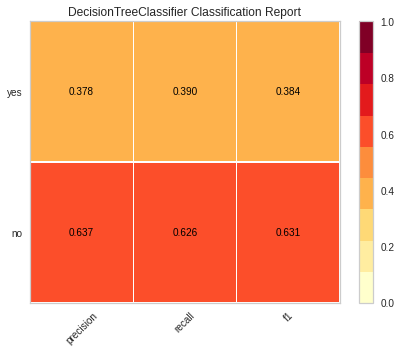

In [ ]:
from yellowbrick.classifier import ClassificationReport
fig, ax = plt.subplots(figsize = (6,5))
visualizer = ClassificationReport(
    best_model,					# Pasar el estimador del mejor modelo que 
    							# se obtiene de la validación cruzada. 
    classes=['no', 'yes']		# Indicar las etiquetas de las clases.
    							# Cuidado con el orden de los nombres.
)
# Ajustamos la visualización a los datos de entrenamiento
visualizer.fit(X_train, y_train)
# Evaluamos los errores en la predicción utilizando los datos de validación.
visualizer.score(X_val, y_val)
# Dibjuamos la visualización.
visualizer.show();

## Curva de precision y recall

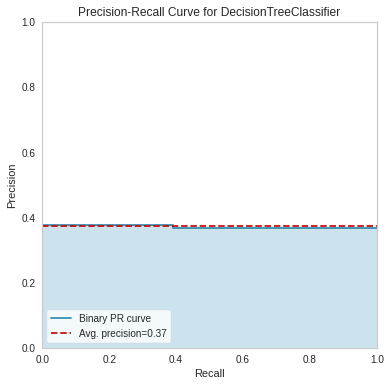

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
# Especificamos la curva de precision y recall
fig, ax = plt.subplots(figsize = (6,6))
viz = PrecisionRecallCurve(best_model) 			# Pasamos el estimado del mejor modelo
												# que obtuvimos con validación cruzada.
# Ajustamos la visualización con los 
# datos de entrenamiento
viz.fit(X_train, y_train)
# Evaluamos con los datos de prueba
viz.score(X_val, y_val)
# Dibujamos la visualización
viz.show();

## Curva ROC y AUC score

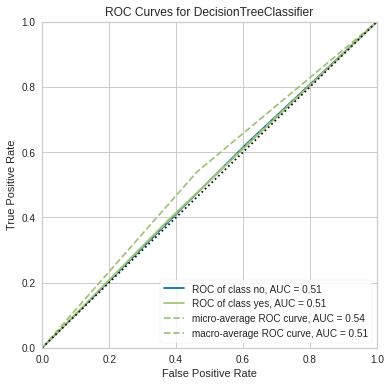

In [ ]:
from yellowbrick.classifier import ROCAUC
# Especificamos la curva ROC AUC
fig, ax = plt.subplots(figsize = (6,6))
roc_curves_visualizer = ROCAUC(
    best_model,					# Pasar el estimador del mejor modelo que 
    							# se obtiene de la validación cruzada.  
    classes=['no', 'yes']		# Indicar las etiquetas de las clases.
    							# Cuidado con el orden de los nombres.
)
# Ajustamos la visualización a los datos de entrenamiento
roc_curves_visualizer.fit(X_train, y_train)
# Evaluamos los errores en la predicción utilizando los datos de validación.
roc_curves_visualizer.score(X_val, y_val) 
# Dibjuamos la visualización.
roc_curves_visualizer.show();

In [ ]:
from sklearn.metrics import roc_auc_score
# Implementación de las métricas con sklearn
print("roc_auc_score: {}".format(np.round(roc_auc_score(y_val, y_pred_proba), 3)))

roc_auc_score: 0.508


##Visualizar la importancia de características (Feature Importances) 

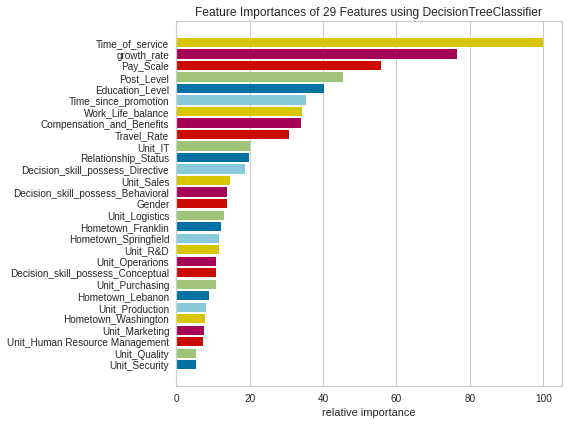

In [ ]:
from yellowbrick.model_selection import FeatureImportances
# Especificamos la gráfica
fig, ax = plt.subplots(figsize = (8,6))
viz = FeatureImportances(best_model) 	# Pasar el estimador del mejor modelo que 
    									# se obtiene de la validación cruzada.
# Ajustamos la visualización a los datos de entrenamiento
viz.fit(X_train, y_train)
# Dibjuamos la visualización.
viz.show();

#Evaluacion de mas modelos

In [ ]:
from yellowbrick.classifier.threshold import DiscriminationThreshold
from yellowbrick.classifier import (
    ConfusionMatrix, ClassPredictionError, ClassificationReport,
    PrecisionRecallCurve, ROCAUC, ClassPredictionError
)
from yellowbrick.model_selection import FeatureImportances

def fun_graficar_matriz_confusion(model, X_val_test, y_val_test):
    '''Graficar matriz de confusión
    
    Parameters
    ----------
    model (Estimator): Fitted estimator
    X_test (DataFrame): Predictores del conjunto de validación o prueba.
    y_test (ndarray): Clases del conjunto de validación o prueba.
    ''' 
    fig, ax = plt.subplots(figsize = (5,5))
    cm = ConfusionMatrix(
        model,
        classes=['no', 'yes']
    )
    cm.fit(X_train, y_train)
    cm.score(X_val_test, y_val_test)
    cm.show();
    
def fun_graficar_reporte_clasificacion(model, X_val_test, y_val_test):
    '''Graficar reporte de clasificación
    
    Parameters
    ----------
    model (Estimator): Fitted estimator
    X_test (DataFrame): Predictores del conjunto de validación o prueba.
    y_test (ndarray): Clases del conjunto de validación o prueba.
    '''   
    fig, ax = plt.subplots(figsize = (6,5))
    visualizer = ClassificationReport(
        model,
        classes=['no', 'yes']
    )
    visualizer.fit(X_train, y_train)
    visualizer.score(X_val_test, y_val_test)
    visualizer.show();  
    
def fun_graficar_curva_precision_recall(model, X_val_test, y_val_test):
    '''Graficar curva de precision y recall
    
    Parameters
    ----------
    model (Estimator): Fitted estimator
    X_test (DataFrame): Predictores del conjunto de validación o prueba.
    y_test (ndarray): Clases del conjunto de validación o prueba.
    '''
    fig, ax = plt.subplots(figsize = (6,6))
    viz = PrecisionRecallCurve(model)
    viz.fit(X_train, y_train)
    viz.score(X_val_test, y_val_test)
    viz.show();
    
def fun_graficar_curva_roc(model, X_val_test, y_val_test):
    '''Graficar curva ROC
    
    Parameters
    ----------
    model (Estimator): Fitted estimator
    X_test (DataFrame): Predictores del conjunto de validación o prueba.
    y_test (ndarray): Clases del conjunto de validación o prueba.
    '''
    fig, ax = plt.subplots(figsize = (6,6))
    roc_curves_visualizer = ROCAUC(
        model,
        classes=['no', 'yes']
    )
    roc_curves_visualizer.fit(X_train, y_train)
    roc_curves_visualizer.score(X_val, y_val) 
    roc_curves_visualizer.show();
    
def fun_imprimir_roc_auc_score(model, X_val_test, y_val_test):
    '''Imprime el ROC AUC score
    
    Parameters
    ----------
    model (Estimator): Fitted estimator de un DecisionTree, Random Forest o xgboost.
    X_val_test (DataFrame): Clases actuales
    y_val_test (ndarray): Probabildades de clase
    '''
    print(
        "roc_auc_score: {}".format(
            np.round(roc_auc_score(y_val_test, model.predict_proba(X_val_test)[:,1]), 3)
        )
    )
    
def fun_graficar_error_clasificacion(model, X_val_test, y_val_test):
    '''Graficar error de clasificación
    
    Parameters
    ----------
    model (Estimator): Fitted estimator
    X_test (DataFrame): Predictores del conjunto de validación o prueba.
    y_test (ndarray): Clases del conjunto de validación o prueba.
    '''
    fig, ax = plt.subplots(figsize = (7,6))
    cpe_viz = ClassPredictionError(model, classes = ['no', 'yes'])
    cpe_viz.fit(X_train, y_train)
    cpe_viz.score(X_val_test, y_val_test)
    cpe_viz.show();

def fun_graficar_importancias(model):
    '''Graficar importancia de características
    
    Parameters
    ----------
    model (Estimator): Fitted estimator de un DecisionTree, Random Forest o xgboost.
    '''
    fig, ax = plt.subplots(figsize = (8,6))
    viz = FeatureImportances(model)
    viz.fit(X_train, y_train)
    viz.show();
    
def fun_graficar_discrimination_threshold(model, X_val_test, y_val_test):
    '''Graficar relación de precision y recall con distintos puntos de corte
    
    Parameters
    ----------
    model (Estimator): Fitted estimator de un DecisionTree, Random Forest o xgboost.
    X_val_test (DataFrame): Clases actuales
    y_val_test (ndarray): Probabildades de clase
    '''
    fig, ax = plt.subplots(figsize = (8,6))
    visualizer = DiscriminationThreshold(
        model,
        exclude = ["queue_rate"]
    )
    visualizer.fit(X_val_test, y_val_test)
    visualizer.show();     

##Random Forest

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Especificar bosque aleatorio
clf_rf = RandomForestClassifier(
    random_state = 1234, 
    class_weight = 'balanced'
)
# Especificar la combinación de parámetros
# que queremos explroar.
#params = {
#    'n_estimators':[50, 100, 150, 200],
#    'max_depth':[5, 10, 25, 50],
#    'min_samples_split':[2, 4, 6, 8],
#    'min_samples_leaf':[1, 2, 4, 5]
#}

params = {
    'n_estimators':[300, 500],
    'max_depth':[5, 20],
    'min_samples_split':[2],
    'min_samples_leaf':[1]
}
# Especificar el GridSearch con validación cruzada
grid_search = GridSearchCV(
    clf_rf,					# Especificar el modelo (estimador)
    params, 				# Especificar los parámetros de la malla
    scoring = 'roc_auc', 	# Especificar la métrica de evaluación
    cv = 10, 				# Especificar los k-cortes de la validación cruzada
    return_train_score=True,# Agregar el error de entrenamiento
    n_jobs=-1				# Especificar el número de CPUs -1= todos los disponibles
)
# Entrenar los modelos
grid_search.fit(X_train, y_train)

CPU times: user 3.44 s, sys: 81.5 ms, total: 3.52 s
Wall time: 1min


In [ ]:
# Recupearar los resultados de la validación cruzada
df_best_params = pd.DataFrame(grid_search.cv_results_)
tabla_resultados = fun_plot_grid_search_results(df_best_params)
tabla_resultados

,max_depth,min_samples_leaf,min_samples_split,n_estimators,mean_train_score,mean_test_score,rank_test_score
3,20,1,2,500,1.000000,0.488645,1
2,20,1,2,300,1.000000,0.487618,2
1,5,1,2,500,0.805526,0.471888,3
0,5,1,2,300,0.798930,0.471142,4


In [ ]:
# Recuepar los resultados de la validación cruzada.
fun_resumen_grid_search(grid_search)


Se evaluaron 4 modelos utilizando el grid search.

Los hiperparámetros del mejor modelo son: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}



In [ ]:
# Recuperar el estimador del mejor modelo.
best_model_rf = grid_search.best_estimator_

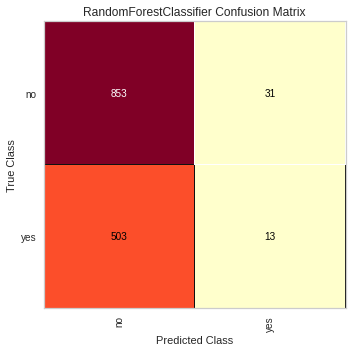

In [ ]:
# Graficar matriz de confusión
fun_graficar_matriz_confusion(best_model_rf, X_val, y_val)

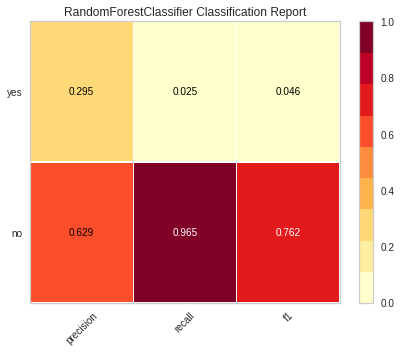

In [ ]:
# Graficar reporte de clasificación
fun_graficar_reporte_clasificacion(best_model_rf, X_val, y_val)

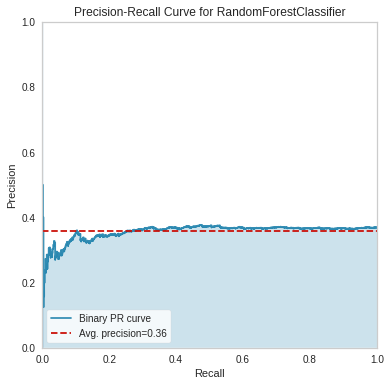

In [ ]:
# Graficar curva de precision y recall
fun_graficar_curva_precision_recall(best_model_rf, X_val, y_val)   

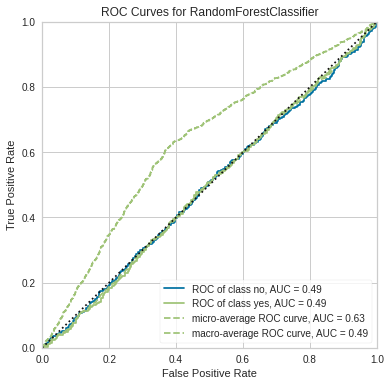

In [ ]:
# Graficar curva ROC
fun_graficar_curva_roc(best_model_rf, X_val, y_val)

In [ ]:
# Imprimir el ROC AUC score
fun_imprimir_roc_auc_score(best_model_rf, X_val, y_val)

roc_auc_score: 0.493


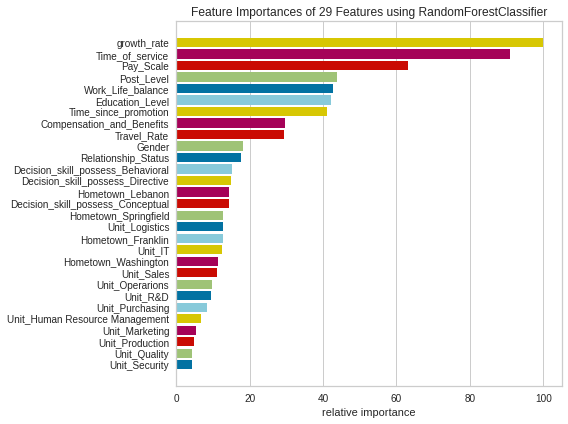

In [ ]:
# Graficar importancia de características
fun_graficar_importancias(best_model_rf)

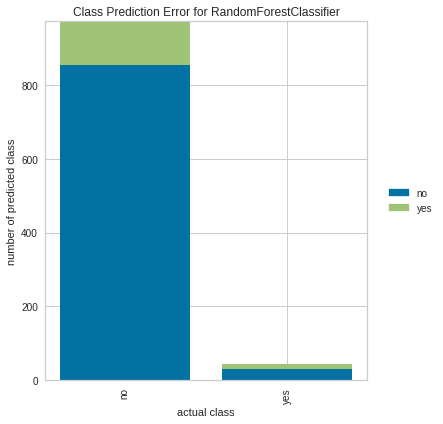

In [ ]:
# Graficar error de clasificación
fun_graficar_error_clasificacion(best_model_rf, X_val, y_val)

##XGBOOST

In [ ]:
import xgboost as xgb
# Especificamos el modelo 
# (Ojo, este algorítmo usa otros nombres para los parámetros)
clf_xgb = xgb.XGBClassifier(
    objective='binary:logistic',		# Para un problema de clasificación binaria
    eval_metric='auc',					# Métrica de evaluación
    scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    									# scale_pos_weight es el parámetro para 
    									# reponderar las categorías con desbalance.
    use_label_encoder=False,			# Hay que indicar esta opción
    random_state=seed					# Fijar semilla para reproducibilidad
)
# Especificar los parámetros a explorar
#params = {
#    'n_estimators':[50, 100, 150, 200],
#    'learning_rate':[.01, .001],
#    'max_depth':[5, 10, 25, 50],
#    'subsample':[0.25, 0.50, 0.75],
#    'colsample_bytree':[0.25, 0.50, 0.75],
#    'colsample_bylevel':[0.25, 0.50, 0.75],
#    'reg_lambda':[0.01, 10, 100, 150, 200]
#}

params = {
    'n_estimators':[150],
    'learning_rate':[.01],
    'max_depth':[5, 9],
    'subsample':[0.6, 0.8],
    'colsample_bytree':[0.7, 0.9],
    'colsample_bylevel':[0.75],
    'reg_lambda':[0.01]
}

grid_search = RandomizedSearchCV(
	clf_xgb,					# Especificar el modelo (estimador) 
	params,						# Especificar los parámetros de la malla 
	scoring = 'roc_auc', 		# Especificar la métrica de evaluación
	cv = 10,					# Especificar los k-cortes de la validación cruzada 
	n_iter=100,					# Especificar número de modelos a explorar aleatoriamente 
    return_train_score=True,# Agregar el error de entrenamiento
	n_jobs=-1					# Especificar el número de CPUs para paralelizar el trabajo
    							# -1= todos los disponibles
)
# Entrenar los modelos
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(eval_metric='auc', random_state=1234,
                                           scale_pos_weight=1.7149321266968325,
                                           use_label_encoder=False),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bylevel': [0.75],
                                        'colsample_bytree': [0.7, 0.9],
                                        'learning_rate': [0.01],
                                        'max_depth': [5, 9],
                                        'n_estimators': [150],
                                        'reg_lambda': [0.01],
                                        'subsample': [0.6, 0.8]},
                   return_train_score=True, scoring='roc_auc')

In [ ]:
# Recupearar los resultados de la validación cruzada
df_best_params = pd.DataFrame(grid_search.cv_results_)
tabla_resultados = fun_plot_grid_search_results(df_best_params)
tabla_resultados

,subsample,reg_lambda,n_estimators,max_depth,learning_rate,colsample_bytree,colsample_bylevel,mean_train_score,mean_test_score,rank_test_score
6,0.600000,0.010000,150.000000,9.000000,0.010000,0.900000,0.750000,0.993845,0.491532,1
3,0.800000,0.010000,150.000000,9.000000,0.010000,0.700000,0.750000,0.997213,0.486753,2
2,0.600000,0.010000,150.000000,9.000000,0.010000,0.700000,0.750000,0.993274,0.486034,3
1,0.800000,0.010000,150.000000,5.000000,0.010000,0.700000,0.750000,0.843014,0.485531,4
7,0.800000,0.010000,150.000000,9.000000,0.010000,0.900000,0.750000,0.996883,0.484285,5
4,0.600000,0.010000,150.000000,5.000000,0.010000,0.900000,0.750000,0.840898,0.479299,6
5,0.800000,0.010000,150.000000,5.000000,0.010000,0.900000,0.750000,0.844696,0.477727,7
0,0.600000,0.010000,150.000000,5.000000,0.010000,0.700000,0.750000,0.838786,0.476687,8


In [ ]:
# Recuepar los resultados de la validación cruzada.
fun_resumen_grid_search(grid_search)


Se evaluaron 8 modelos utilizando el grid search.

Los hiperparámetros del mejor modelo son: {'subsample': 0.6, 'reg_lambda': 0.01, 'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.01, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.75}



In [ ]:
# Recuperar el estimador del mejor modelo.
best_model_xgb = grid_search.best_estimator_

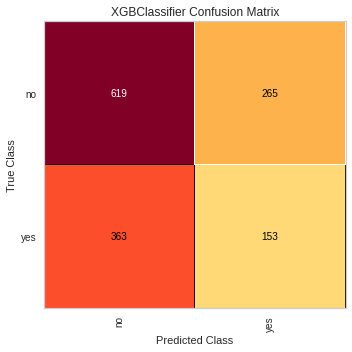

In [ ]:
# Graficar matriz de confusión
fun_graficar_matriz_confusion(best_model_xgb, X_val, y_val)

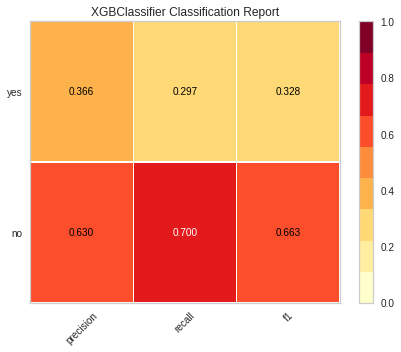

In [ ]:
# Graficar reporte de clasificación
fun_graficar_reporte_clasificacion(best_model_xgb, X_val, y_val)

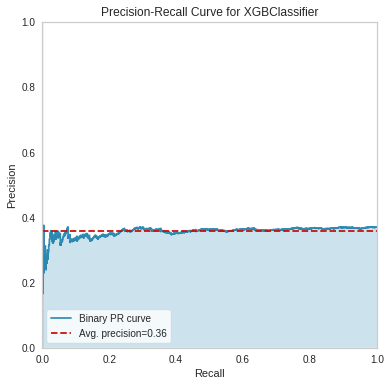

In [ ]:
# Graficar curva de precision y recall
fun_graficar_curva_precision_recall(best_model_xgb, X_val, y_val)

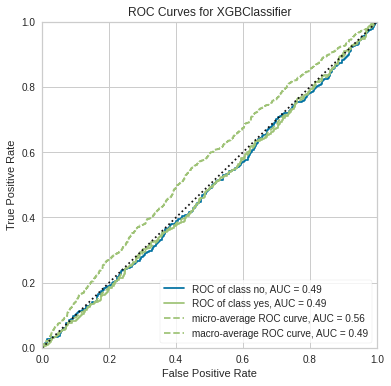

In [ ]:
# Graficar curva ROC AUC
fun_graficar_curva_roc(best_model_xgb, X_val, y_val)

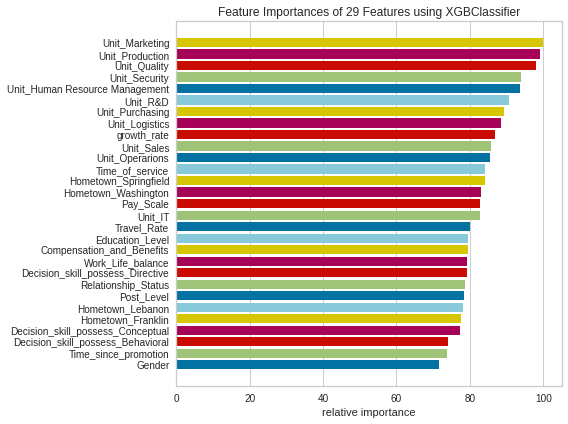

In [ ]:
# Graficar importancia de características
fun_graficar_importancias(best_model_xgb)

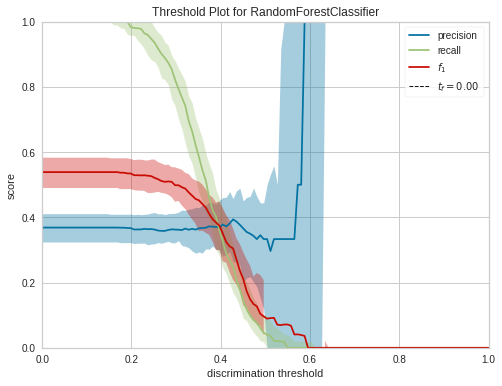

In [ ]:
# Graficar curva de discriminación del punto de corte.
fun_graficar_discrimination_threshold(best_model_rf, X_val, y_val)

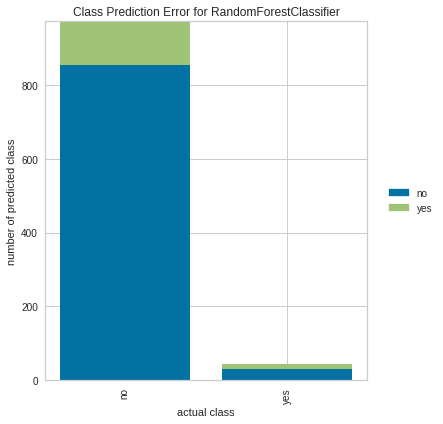

In [ ]:
# Graficar error de clasificación
fun_graficar_error_clasificacion(best_model_rf, X_val, y_val)

##Regresion Logistica

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, RocCurveDisplay, auc
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [ ]:
lrc = LogisticRegression(
    solver='sag',
    class_weight = 'balanced'
)
scores = pd.DataFrame(cross_validate(lrc, X_train, y_train, return_train_score=True))
scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

,fit_time,score_time,test_score,train_score
0,0.140781,0.003096,0.478571,0.523214
1,0.186527,0.009148,0.459524,0.524702
2,0.185812,0.003861,0.500000,0.542262
3,0.189473,0.003781,0.470238,0.526190
4,0.178540,0.003755,0.496429,0.525000


In [ ]:
lrc.fit(X_train, y_train)
predictions_lr = lrc.predict(X_test)
cmlr = confusion_matrix(y_test, predictions_lr)
print(cmlr)

ConfusionMatrixDisplay(
    lrc, X_test, y_test
)

[[460 430]
 [236 274]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
print(
    classification_report(
        y_test,
        lrc.predict(X_test)
    )
)   

              precision    recall  f1-score   support

           0       0.66      0.52      0.58       890
           1       0.39      0.54      0.45       510

    accuracy                           0.52      1400
   macro avg       0.53      0.53      0.52      1400
weighted avg       0.56      0.52      0.53      1400



## Maquinas de Vectores de Soporte

In [ ]:
from sklearn.utils import class_weight
from math import gamma
svmc = SVC(
    gamma= 'auto', 
    class_weight= 'balanced'
)

scores = pd.DataFrame(cross_validate(svmc, X_train, y_train , return_train_score=True))
scores

,fit_time,score_time,test_score,train_score
0,1.039628,0.253844,0.508333,0.766667
1,0.970224,0.260237,0.507143,0.762202
2,0.981982,0.270096,0.508333,0.772619
3,0.996416,0.256887,0.519048,0.767857
4,0.995692,0.255218,0.528571,0.778571


In [ ]:
svmc.fit(X_train, y_train)
predictions_svmc = svmc.predict(X_test)
cmsvmc = confusion_matrix(y_test, predictions_svmc)
print(cmsvmc)

ConfusionMatrixDisplay(
    svmc, X_test, y_test
)

[[470 420]
 [275 235]]


In [ ]:
print(
    classification_report(
        y_test,
        svmc.predict(X_test)
    )
)   

              precision    recall  f1-score   support

           0       0.63      0.53      0.57       890
           1       0.36      0.46      0.40       510

    accuracy                           0.50      1400
   macro avg       0.49      0.49      0.49      1400
weighted avg       0.53      0.50      0.51      1400



##comparacion ROC

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
No handles with labels found to put in legend.


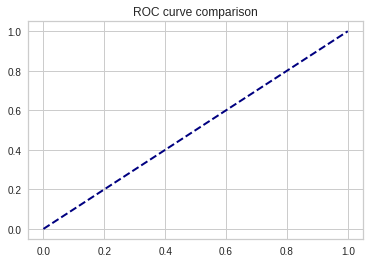

In [ ]:
#clf_rf.fit(X_train, y_train)
#clf_xgb.fit(X_train, y_train)
#lrc.fit(X_train, y_train)
#svmc.fit(X_train, y_train)

##plt.figure()
#lw = 2
#disp = RocCurveDisplay(clf_rf, X_test, y_test)
#RocCurveDisplay(clf_xgb, X_test, y_test)
#RocCurveDisplay(lrc, X_test, y_test)
#RocCurveDisplay(svmc, X_test, y_test)
#plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")
#plt.title("ROC curve comparison")
#plt.legend(loc="lower right")
#plt.show()

In [ ]:
pred = pd.DataFrame(y_pred_proba.transpose())
pred

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1395,1.0
1396,0.0
1397,0.0
1398,0.0


In [ ]:
resumen = pd.DataFrame(data['Employee_ID'], data['Attrition_label'])
resumen.to_csv('')

TypeError: ignored